In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import mplcyberpunk

In [2]:
plt.style.use('cyberpunk')
#mplcyberpunk.make_lines_glow()

$$\frac{d^2x}{dt^2} = \sin(x)$$

$$x(0) = 0$$

$$\dot{x}(0) = 5$$

#### Function that cpmputes the n-th derivative of a function net

In [3]:
def nth_derivative(net, x, n):
    # Initialize the gradient tensor to 1.0, as the 0th derivative is the function itself.
    grad_tensor = torch.ones(x.size(), dtype=torch.float32, requires_grad=True)
    ann=net(x)
    for _ in range(n):
        # Compute the gradient of the network's output with respect to the input.
        ann = torch.autograd.grad(ann, x, grad_outputs=grad_tensor, create_graph=True)[0]
    return ann

In [4]:
#1 Define the fucntion that describes the differential equation F(t;x,x',...)=0
def oscilador(net,t):
    return nth_derivative(net, t, 2) - torch.sin(t)

In [5]:
nodos=40
ANN = nn.Sequential(nn.Linear(1, nodos), nn.Tanh(), nn.Linear(nodos,nodos),
                     # nn.Tanh(), nn.Linear(nodos,nodos),
                     # nn.Tanh(), nn.Linear(nodos,nodos),
                    # nn.Tanh(), nn.Linear(nodos,nodos),
                    # nn.Tanh(), nn.Linear(nodos,nodos),
                    nn.Tanh(),nn.Linear(nodos,1))
print(ANN)

Sequential(
  (0): Linear(in_features=1, out_features=40, bias=True)
  (1): Tanh()
  (2): Linear(in_features=40, out_features=40, bias=True)
  (3): Tanh()
  (4): Linear(in_features=40, out_features=1, bias=True)
)


In [6]:
# Now the re-parametrization of the network, depends on the initial conditions
def ReParam(t,net=ANN):
    a=(t-ti)*v0
    b=(1-torch.exp(ti-t))**2
    return x0 + a + b*net(t)

In [7]:
#Now the cost function
x0=5.0
v0=0.0
ti=0.0
tf=10.0
def cost(t):
    t.requires_grad=True
    #calculamos una salida de la red

    return torch.linalg.norm(oscilador(ReParam,t))

In [8]:
#5 el intervalo que queremos para x
puntos=40
x = torch.linspace(0,10,puntos)
x=x.reshape(puntos,1)

In [9]:
#4 Error and optimizer
learning_rate=0.01
epocas=5000

#optimizer=torch.optim.SGD(ANN.parameters(),lr=learning_rate,momentum=0.9)
optimizer=optimizer = torch.optim.Adam(ANN.parameters(), lr=learning_rate)
#optimizer = torch.optim.Adadelta(ANN.parameters(), lr=learning_rate)

época=4999.00 , loss=0.22


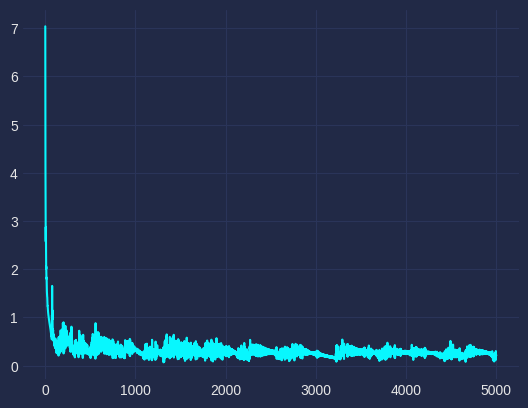

In [12]:
#loop de entrenamiendo 
errores=[]
for i in range(epocas):
    l=cost(x) #coste
    l.backward() #gradiente
    optimizer.step() #se actualizan los parámetros
    optimizer.zero_grad() #vacíamos el gradiente
    #print('época=%.2f , loss=%.2f'%(i,l))
    errores.append(float(l))
print('época=%.2f , loss=%.2f'%(i,l))
plt.plot(range(epocas),errores)


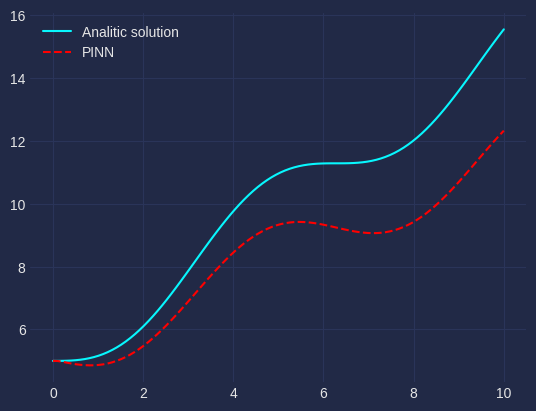

In [13]:
#loop de entrenamiendo 
x = torch.linspace(0,10,100)
x=x.reshape(100,1)

#plt.plot(x,x**2,'ro')
plt.plot(x,x-torch.sin(x) + 5,label='Analitic solution')
plt.plot(x,ReParam(x,net=ANN).detach().numpy(),'--r', label='PINN')
plt.legend()
#mplcyberpunk.make_lines_glow()